In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## Load data

In [2]:
# Convert data into pandas DataFrame

aisles=pd.read_csv('datasets/aisles.csv', 
                   dtype={'aisle_id': 'uint8', 
                          'aisle': str})
departments=pd.read_csv('datasets/departments.csv',
                       dtype={'department': str,
                              'department_id': 'uint8'})
order_products_prior=pd.read_csv('datasets/order_products__prior.csv',
                                dtype={'order_id': np.uint32,
                                      'product_id': np.int32,
                                      'add_to_cart_order': 'uint8',
                                      'reorder': 'uint8'})
order_products_train=pd.read_csv('datasets/order_products__train.csv',
                                dtype={'product_id': np.int32,
                                       'order_id': np.uint32,      
                                       'reorder': 'uint8',
                                      'add_to_cart_order': 'uint8'})
products=pd.read_csv('datasets/products.csv',
                    dtype={'product_name': str,
                        'product_id': np.uint32, 
                           'department_id': np.uint32,
                          'aisle_id': np.uint32})
orders=pd.read_csv('datasets/orders.csv',
                  dtype={'order_number':'uint8',
                        'order_id': np.uint32,                        
                        'eval_set': str,      
                        'user_id': np.uint32,
                        'order_dow': 'uint8',                        
                        'days_since_prior_order': 'float16',
                        'order_hour_of_day': 'uint8',})
print(aisles.head(5))
print(departments.head(5))
print(order_products_prior.head(5))
print(order_products_train.head(5))
print(products.head(5))
print(orders.head(5))



   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          

### Aisles

In [3]:
aisles.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    uint8 
 1   aisle     134 non-null    object
dtypes: object(1), uint8(1)
memory usage: 1.3+ KB


### Departments

In [4]:
departments.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     uint8 
 1   department     21 non-null     object
dtypes: object(1), uint8(1)
memory usage: 317.0+ bytes


### Order Products Prior

In [5]:
order_products_prior.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype 
---  ------             --------------     ----- 
 0   order_id           32434489 non-null  uint32
 1   product_id         32434489 non-null  int32 
 2   add_to_cart_order  32434489 non-null  uint8 
 3   reordered          32434489 non-null  int64 
dtypes: int32(1), int64(1), uint32(1), uint8(1)
memory usage: 525.8 MB


### Order Products Train

In [6]:
order_products_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   order_id           1384617 non-null  uint32
 1   product_id         1384617 non-null  int32 
 2   add_to_cart_order  1384617 non-null  uint8 
 3   reordered          1384617 non-null  int64 
dtypes: int32(1), int64(1), uint32(1), uint8(1)
memory usage: 22.4 MB


### Products

In [7]:
products.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  uint32
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  uint32
 3   department_id  49688 non-null  uint32
dtypes: object(1), uint32(3)
memory usage: 970.6+ KB


### Orders

In [8]:
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                3421083 non-null  uint32 
 1   user_id                 3421083 non-null  uint32 
 2   eval_set                3421083 non-null  object 
 3   order_number            3421083 non-null  uint8  
 4   order_dow               3421083 non-null  uint8  
 5   order_hour_of_day       3421083 non-null  uint8  
 6   days_since_prior_order  3214874 non-null  float16
dtypes: float16(1), object(1), uint32(2), uint8(3)
memory usage: 68.5+ MB


In [9]:
# Number of unique values per column
orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [10]:
orders.eval_set.unique()

array(['prior', 'train', 'test'], dtype=object)

In [11]:
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                3421083 non-null  uint32 
 1   user_id                 3421083 non-null  uint32 
 2   eval_set                3421083 non-null  object 
 3   order_number            3421083 non-null  uint8  
 4   order_dow               3421083 non-null  uint8  
 5   order_hour_of_day       3421083 non-null  uint8  
 6   days_since_prior_order  3214874 non-null  float16
dtypes: float16(1), object(1), uint32(2), uint8(3)
memory usage: 68.5+ MB


In [12]:
orders.days_since_prior_order.isna().sum()

206209

In [13]:
days_prior_order=orders.days_since_prior_order
days_prior_order.fillna(0,inplace=True)
days_prior_order


0           0.0
1          15.0
2          21.0
3          29.0
4          28.0
           ... 
3421078    29.0
3421079    30.0
3421080    18.0
3421081     7.0
3421082    30.0
Name: days_since_prior_order, Length: 3421083, dtype: float16

### Duplicates

In [14]:
aisles.duplicated().any()

False

In [15]:
departments.duplicated().any()

False

In [16]:
order_products_prior.duplicated().any()

False

In [17]:
order_products_train.duplicated().any()

False

In [18]:
products.duplicated().any()

False

In [19]:
orders.duplicated().any()

False

### Merging Tables

In [20]:
order_products_merged=pd.concat([order_products_train,order_products_prior],ignore_index=True)
order_products_merged.head(5)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [21]:
prod_dept=products.merge(departments, on='department_id')
product_info=prod_dept.merge(aisles, on='aisle_id')
product_info.head(5)


,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


In [22]:
orders_product_merged = orders.merge(order_products_merged,on='order_id')
orders_product_merged.head(10)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,0.0,196,1,0
1,2539329,1,prior,1,2,8,0.0,14084,2,0
2,2539329,1,prior,1,2,8,0.0,12427,3,0
3,2539329,1,prior,1,2,8,0.0,26088,4,0
4,2539329,1,prior,1,2,8,0.0,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [23]:
order_products_merged_2 = order_products_merged.merge(products, on ='product_id', how='left')
order_products_merged_2 = order_products_merged_2.merge(aisles, how ='left', on='aisle_id')
order_products_merged_2 = order_products_merged_2.merge(departments, how ='left', on='department_id')
order_products_merged_2 = order_products_merged_2.merge(orders, on='order_id', how='left')
order_products_merged_2

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,prior,24,2,6,21.0
33819102,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,prior,24,2,6,21.0
33819103,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,prior,24,2,6,21.0
33819104,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,prior,24,2,6,21.0


### EDA

#### Q1. How many percent of purchases are first purchase and how many are reorders?

In [24]:
prior_train=pd.concat([order_products_train, order_products_prior])
prior_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [25]:
data=orders.merge(prior_train, on='order_id')
data

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,0.0,196,1,0
1,2539329,1,prior,1,2,8,0.0,14084,2,0
2,2539329,1,prior,1,2,8,0.0,12427,3,0
3,2539329,1,prior,1,2,8,0.0,26088,4,0
4,2539329,1,prior,1,2,8,0.0,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
33819101,272231,206209,train,14,6,14,30.0,40603,4,0
33819102,272231,206209,train,14,6,14,30.0,15655,5,0
33819103,272231,206209,train,14,6,14,30.0,42606,6,0
33819104,272231,206209,train,14,6,14,30.0,37966,7,0


In [26]:
prod_info = products.merge(departments,on='department_id').merge(aisles,on='aisle_id')
prod_info

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk,bulk dried fruits vegetables
49684,28655,Crystallized Ginger Chunks,18,10,bulk,bulk dried fruits vegetables
49685,30365,Vegetable Chips,18,10,bulk,bulk dried fruits vegetables
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk,bulk dried fruits vegetables


In [27]:
reordered_orders=data[data.reordered==1]
reordered_count=len(reordered_orders.index)
reordered_count

19955360

In [28]:
non_reordered_orders=data[data.reordered==0]
non_reordered_count=len(non_reordered_orders.index)
non_reordered_count

13863746

In [29]:
order_percentage=100*(non_reordered_count/(reordered_count+non_reordered_count))
order_percentage

40.993827571905655

In [30]:
percentage=100*(reordered_count/(reordered_count+non_reordered_count))
percentage

59.00617242809434

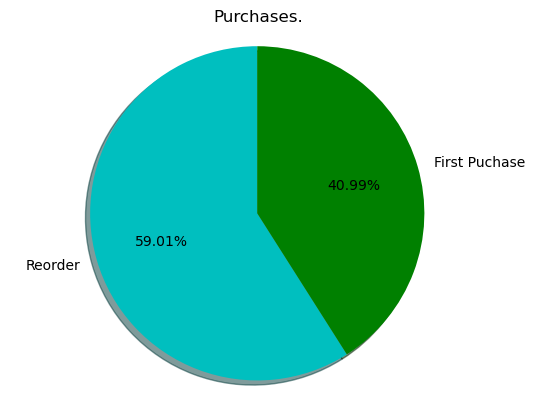

In [31]:
labels = 'Reorder','First Puchase'

plt.pie([percentage,100-percentage], labels=labels, colors=['c', 'g'], startangle=90, shadow=True, autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Purchases.');

#### Q1. How many users placed n number of orders?

In [32]:
orders_per_user = orders.groupby('user_id').size().sort_values().reset_index()


In [33]:
orders_per_user

,user_id,0
0,127633,4
1,74147,4
2,160570,4
3,160560,4
4,74171,4
...,...,...
206204,1868,100
206205,31118,100
206206,122476,100
206207,120897,100


<AxesSubplot:ylabel='count'>

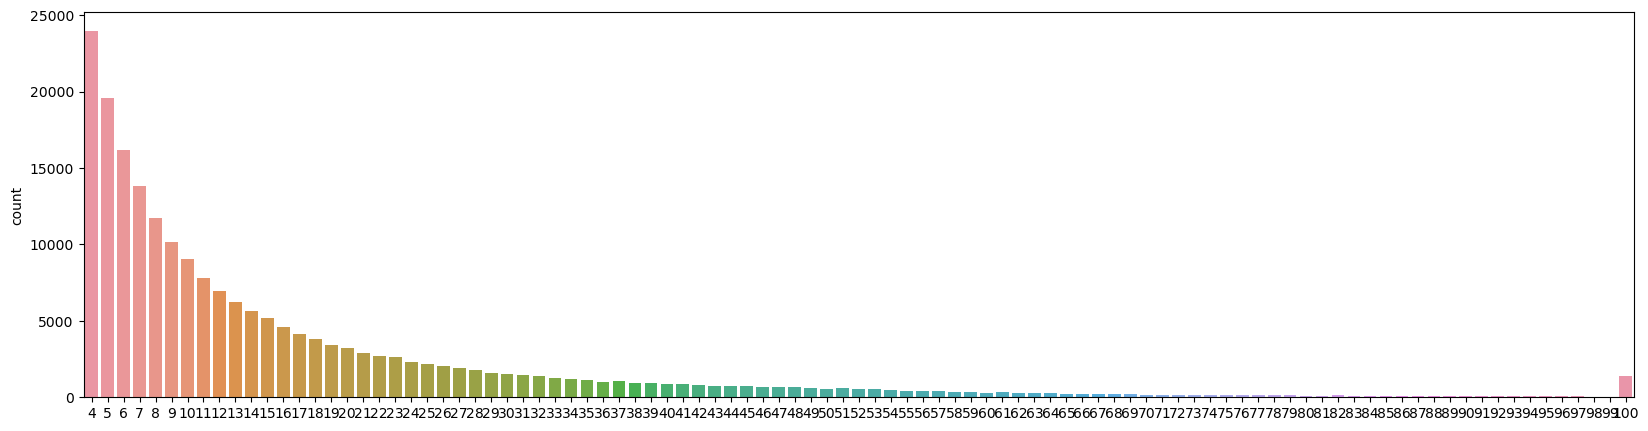

In [34]:
fig, axis=plt.subplots(figsize=(20,5))
sns.countplot(data=orders_per_user, x=orders.groupby('user_id').size(), ax=axis)


In [35]:
orders.groupby('user_id').size().sort_values().reset_index()

,user_id,0
0,127633,4
1,74147,4
2,160570,4
3,160560,4
4,74171,4
...,...,...
206204,1868,100
206205,31118,100
206206,122476,100
206207,120897,100


#### Q2: How many Orders with no reordered products ?

In [36]:
orders_count=prior_train.groupby(['order_id'])['reordered'].sum().reset_index(name='counts')

In [37]:
order_with_reordered_items=sum(orders_count['counts']!=0)

In [38]:
order_with_reordered_items/prior_train['order_id'].nunique()

0.8813194412690899

In [39]:
order_with_no_reordered_items=sum(orders_count['counts']==0)

In [40]:
order_with_no_reordered_items/prior_train['order_id'].nunique()

0.11868055873091014

In [41]:
prior_train.groupby(['order_id'])['reordered'].sum()

order_id
1           4
2           6
3           8
4          12
5          21
           ..
3421079     0
3421080     4
3421081     0
3421082     4
3421083     4
Name: reordered, Length: 3346083, dtype: int64

In [42]:
orders_count

,order_id,counts
0,1,4
1,2,6
2,3,8
3,4,12
4,5,21
...,...,...
3346078,3421079,0
3346079,3421080,4
3346080,3421081,0
3346081,3421082,4


#### Q3. Which are the most frequently ordered / reordered products ?

In [43]:
order_products=order_products_prior.append(order_products_train)

order_products=order_products.merge(products, on ='product_id', how='left')
order_products=order_products.merge(aisles, how='left', on ='aisle_id')
order_products=order_products.merge(departments, how='left', on ='department_id')
order_products=order_products.merge(orders, how='left', on='order_id')
order_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,3421063,14233,3,1,Natural Artesian Water,115,7,water seltzer sparkling water,beverages,169679,train,30,0,10,4.0
33819102,3421063,35548,4,1,Twice Baked Potatoes,13,20,prepared meals,deli,169679,train,30,0,10,4.0
33819103,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs,139822,train,15,6,10,8.0
33819104,3421070,16953,2,1,Creamy Peanut Butter,88,13,spreads,pantry,139822,train,15,6,10,8.0


In [44]:
temp_dataframe = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total_orders','sum':'total_reorders'})
temp_dataframe = temp_dataframe.sort_values('total_orders', ascending=False).reset_index()
temp_dataframe


,product_name,total_orders,total_reorders
0,Banana,491291,415166
1,Bag of Organic Bananas,394930,329275
2,Organic Strawberries,275577,214448
3,Organic Baby Spinach,251705,194939
4,Organic Hass Avocado,220877,176173
...,...,...,...
49680,Greek Blended Cherry Fat Free Yogurt,1,0
49681,All Natural Stevia Liquid Extract Sweetener,1,0
49682,"Frittata, Farmer's Market",1,0
49683,Max White With Polishing Star Soft Toothbrush,1,0


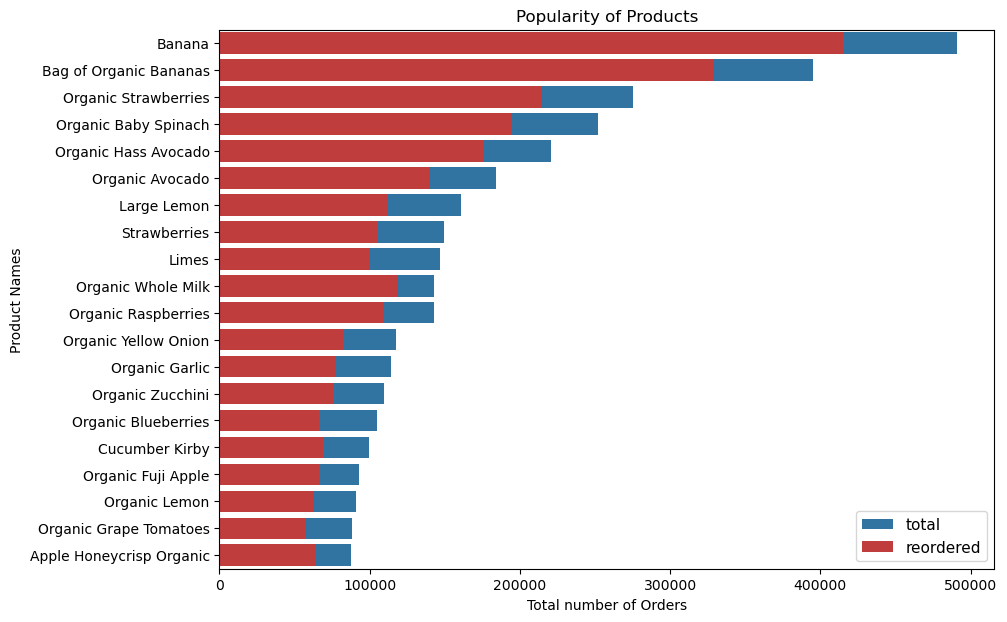

<Figure size 640x480 with 0 Axes>

In [45]:
color_palette = sns.color_palette()

fig, axis = plt.subplots(figsize = (10,7))
axis = sns.barplot(y = temp_dataframe.product_name[0:20], x = temp_dataframe.total_orders[0:20], color=color_palette[0], label = "total")
axis = sns.barplot(y = temp_dataframe.product_name[0:20], x = temp_dataframe.total_reorders[0:20], color=color_palette[3], label = "reordered")
axis.set_ylabel("Product Names")
axis.set_xlabel("Total number of Orders")
axis.set_title("Popularity of Products")
axis.legend(loc = 4, prop={'size': 11})
plt.show()
plt.savefig('fig.png')

In [46]:
temp_df2 = order_products.groupby("product_name")["reordered"].\
                        agg(['count', 'sum']).\
                        rename(columns = {'count':'total_orders','sum':'total_reorders'})
temp_df2 = temp_df2[temp_df2.total_reorders>0]
temp_df2

,total_orders,total_reorders
product_name,,
#2 Coffee Filters,799,265
#2 Cone White Coffee Filters,14,3
#4 Natural Brown Coffee Filters,247,90
& Go! Hazelnut Spread + Pretzel Sticks,174,93
(70% Juice!) Mountain Raspberry Juice Squeeze,28,16
...,...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,41,17
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,57,20
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,74,34


In [47]:
temp_df2['reorder_ratio'] = temp_df2.total_reorders/temp_df2.total_orders
temp_df2 = temp_df2.sort_values('total_orders', ascending=False).reset_index()
temp_df2.head()


,product_name,total_orders,total_reorders,reorder_ratio
0,Banana,491291,415166,0.845051
1,Bag of Organic Bananas,394930,329275,0.833755
2,Organic Strawberries,275577,214448,0.778178
3,Organic Baby Spinach,251705,194939,0.774474
4,Organic Hass Avocado,220877,176173,0.797607


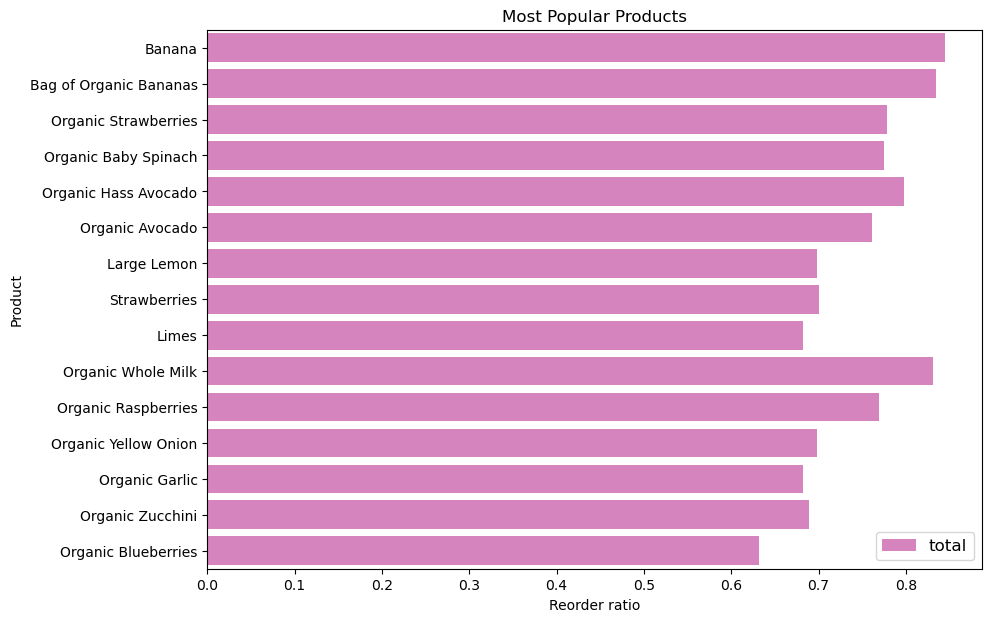

In [48]:
fig, axis = plt.subplots(figsize = (10,7))
axis = sns.barplot(y = temp_df2.product_name[0:15], x = temp_df2.reorder_ratio[0:15], color=color_palette[6], label = "total")
axis.set_ylabel("Product")
axis.set_xlabel("Reorder ratio")
axis.set_title("Most Popular Products")
axis.legend(loc = 4, prop={'size': 12})
plt.show()


#### Q4. Frequently ordered and reordered products categorized by department.

In [49]:
dep_prod_merged=order_products_merged.merge(product_info,on='product_id')

In [50]:
len(departments)

21

Text(0.5, 1.0, 'Count of order for each Department.')

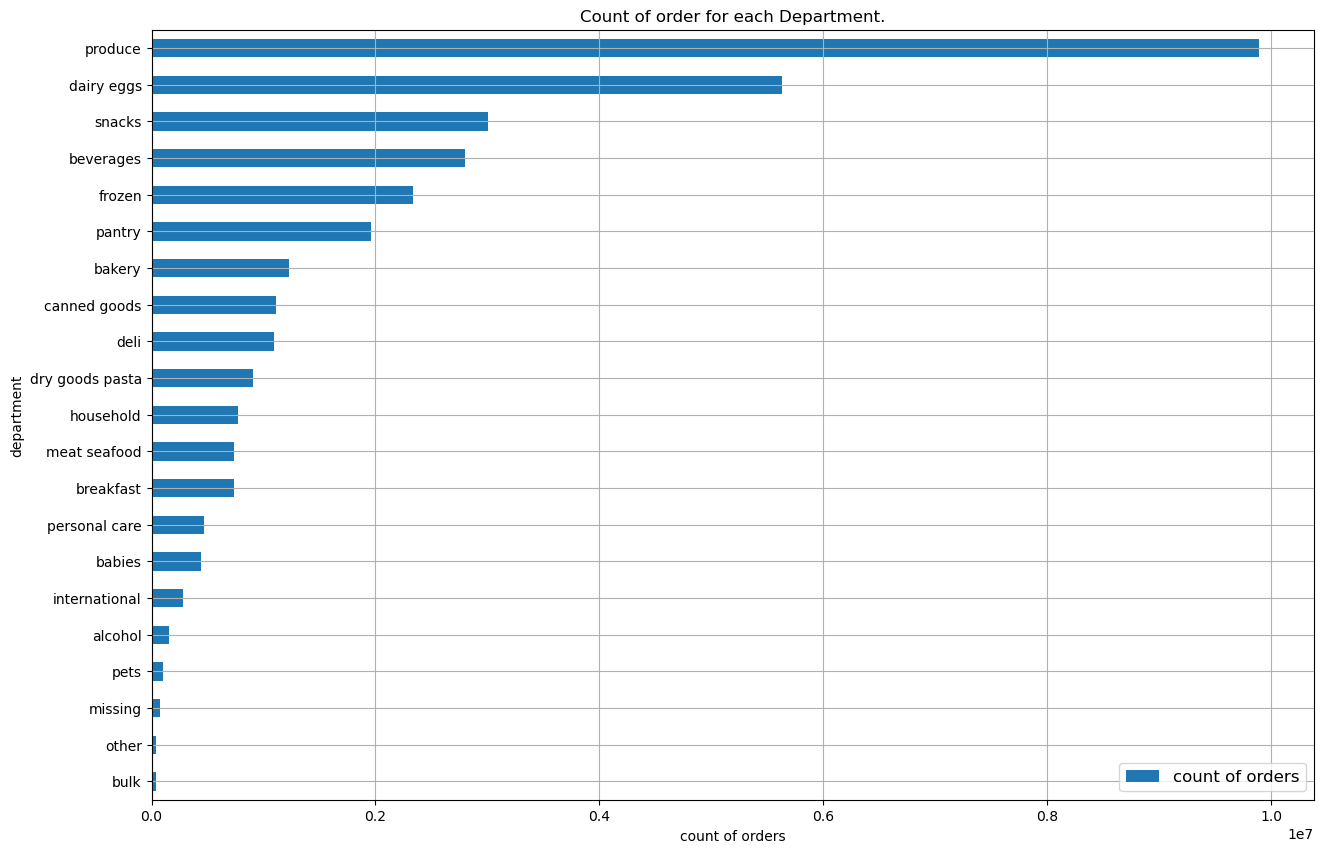

In [51]:
grouped_order=dep_prod_merged.groupby(['department'])['order_id'].count().sort_values()
grouped_order.plot(kind='barh', figsize=(15,10), grid=True, x='count of orders', label='count of orders')
plt.legend(loc = 4, prop={'size': 12})
plt.xlabel('count of orders')
plt.title('Count of order for each Department.')


Text(0.5, 1.0, 'Rate of reorder for each Department.')

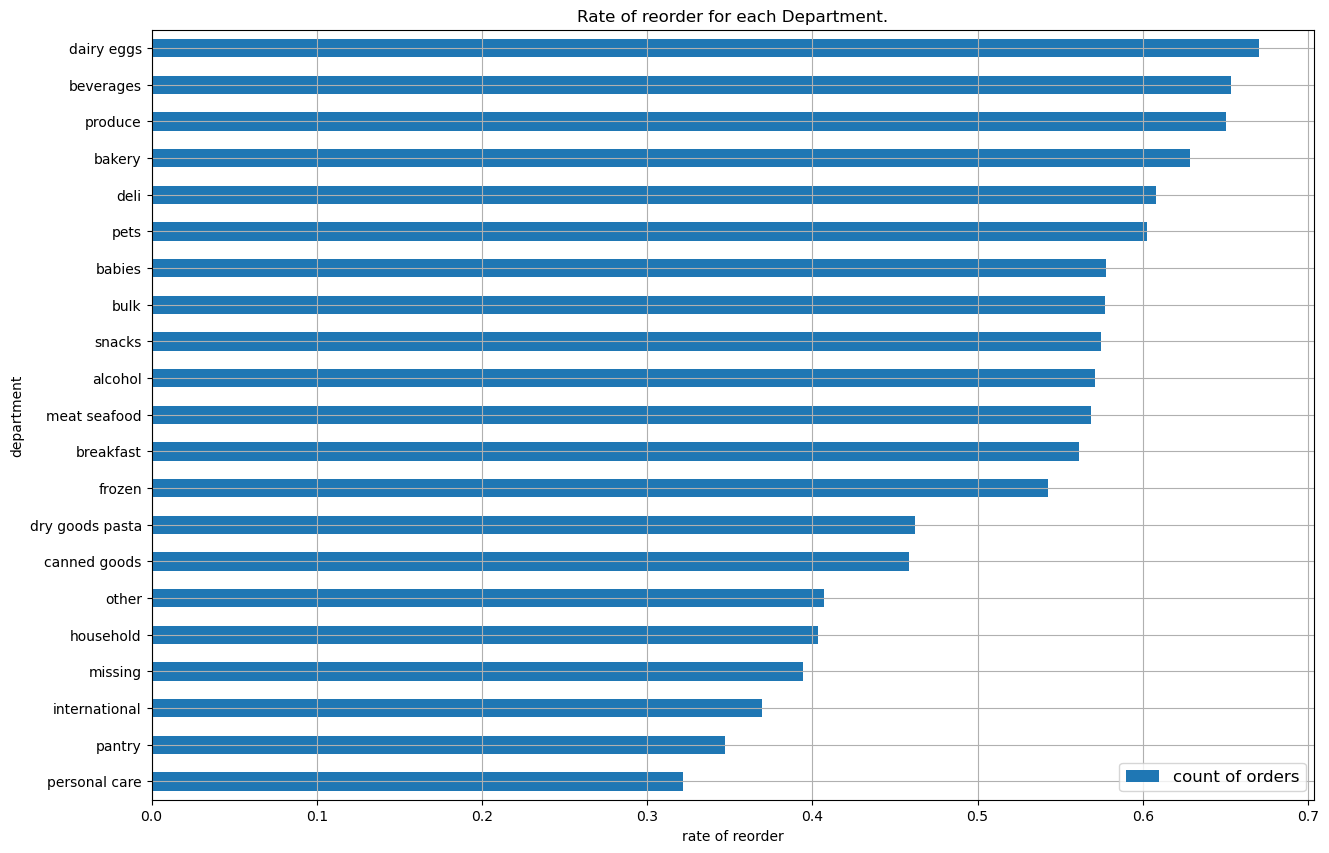

In [52]:
grouped_reorder=dep_prod_merged.groupby(['department'])
mean_sorted_reorder=grouped_reorder['reordered'].mean().sort_values()
mean_sorted_reorder.plot(kind='barh', figsize=(15,10), grid=True, label='count of orders')
plt.legend(loc = 4, prop={'size': 12})
plt.xlabel('rate of reorder')
plt.title('Rate of reorder for each Department.')

#### Q5. Frequently ordered and reordered products categorized by aisle.

Text(0.5, 1.0, 'Count of order for each Aisle.')

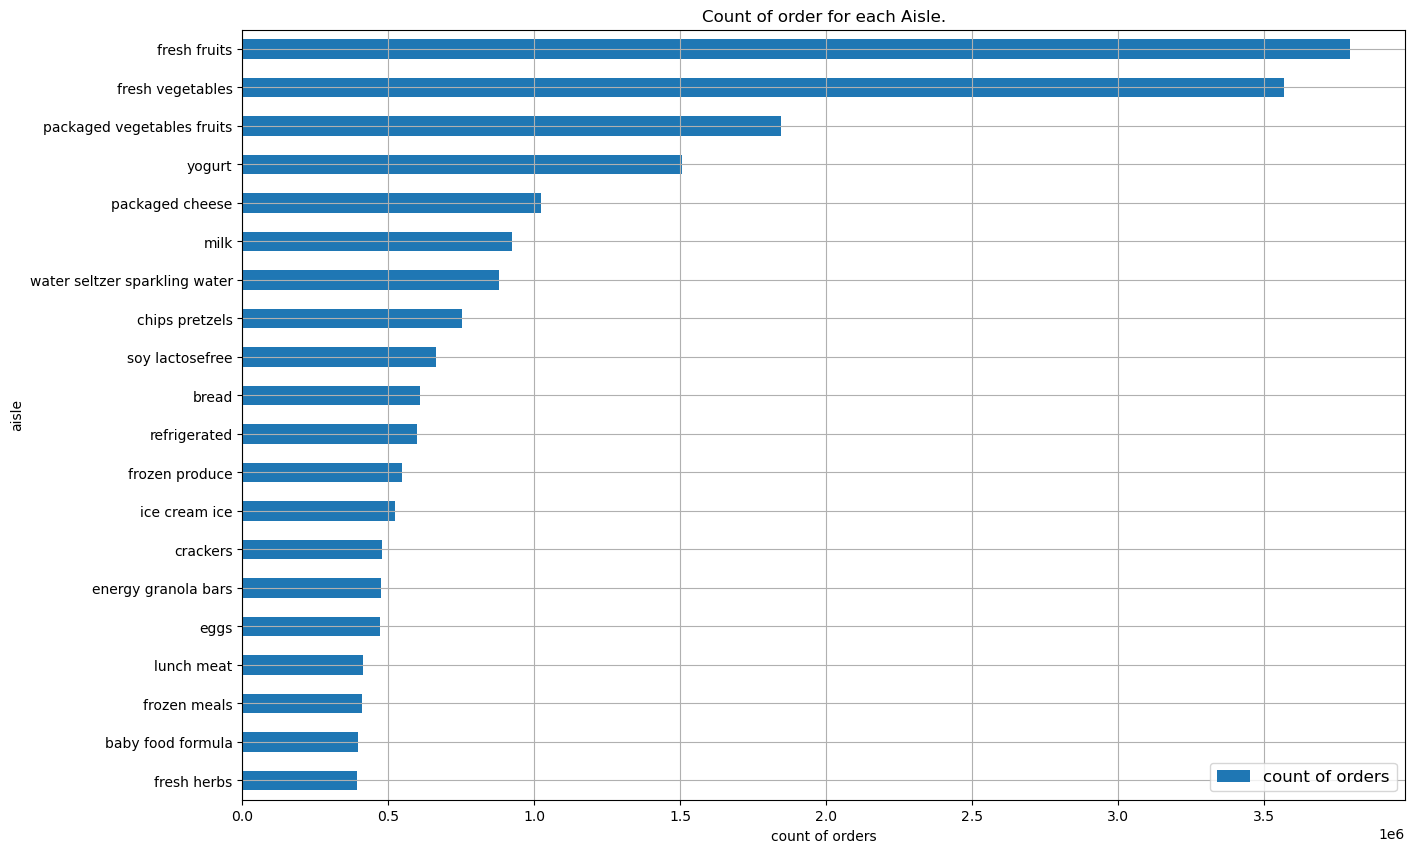

In [53]:
aisle_grouped_order=dep_prod_merged.groupby(['aisle'])['order_id'].count().sort_values()[-20:]
aisle_grouped_order.plot(kind='barh', figsize=(15,10), grid=True, label='count of orders')
plt.legend(loc = 4, prop={'size': 12})
plt.xlabel('count of orders')
plt.title('Count of order for each Aisle.')


Text(0.5, 1.0, 'Rate of reorder for each Aisle.')

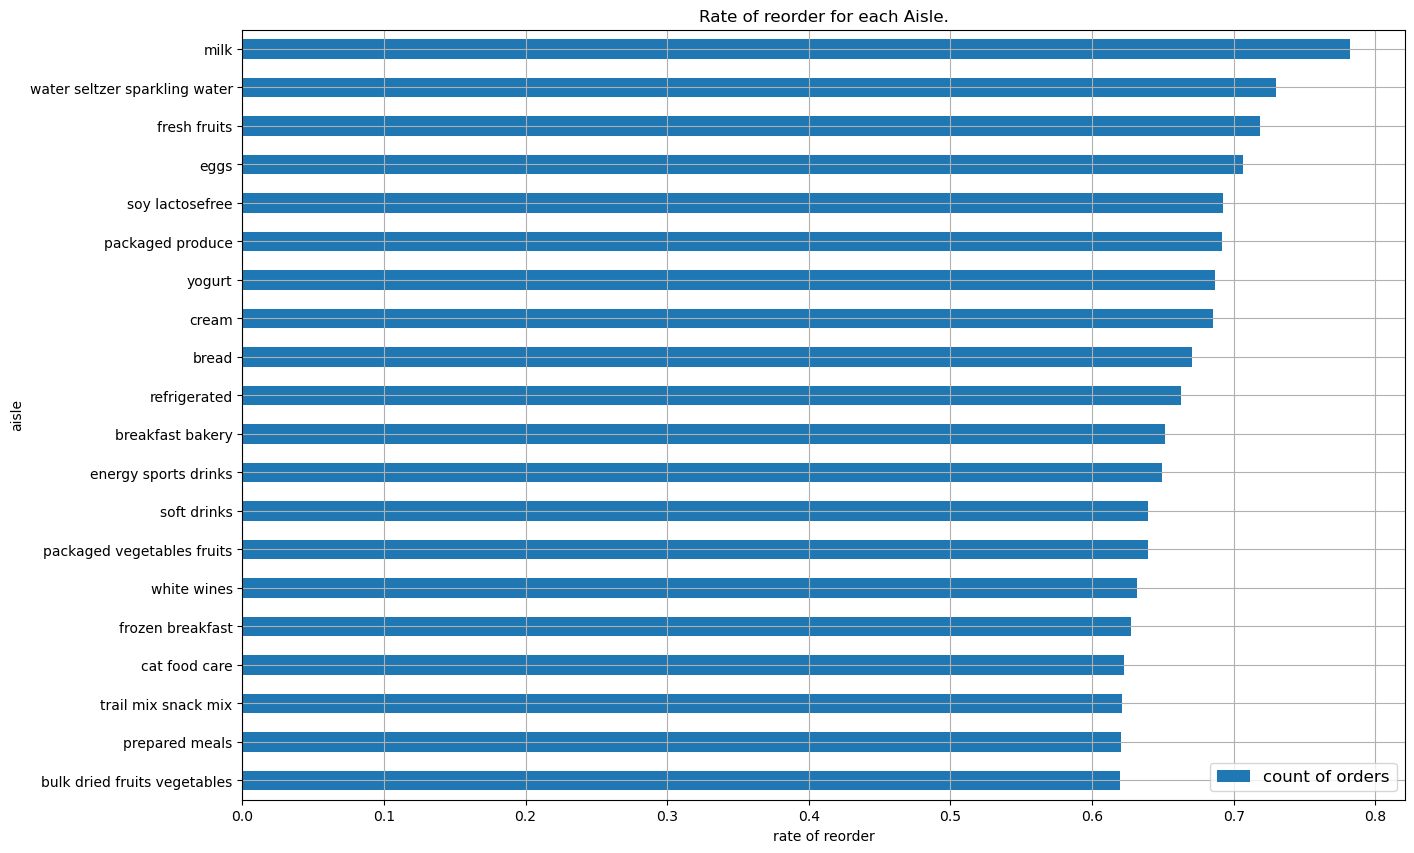

In [54]:
aisle_grouped_reorder=dep_prod_merged.groupby(['aisle'])
aisle_mean_sorted_reorder=aisle_grouped_reorder['reordered'].mean().sort_values()[-20:]
aisle_mean_sorted_reorder.plot(kind='barh', figsize=(15,10), grid=True, label='count of orders')
plt.legend(loc = 4, prop={'size': 12})
plt.xlabel('rate of reorder')
plt.title('Rate of reorder for each Aisle.')

#### Q6. Number of products ordered and reordered in a particular day of the week.


In [55]:
reordered_dow=orders_product_merged.groupby('order_dow')['reordered'].apply(lambda x: (x==1).sum())
print(reordered_dow)

total_orders_dow=orders_product_merged.groupby('order_dow')['order_id'].count()
print(total_orders_dow)


order_dow
0    3831900
1    3544661
2    2582006
3    2344277
4    2330620
5    2613888
6    2708008
Name: reordered, dtype: int64
order_dow
0    6533692
1    5871834
2    4378360
3    3998498
4    3942696
5    4386443
6    4707583
Name: order_id, dtype: int64


In [56]:
d_dow={'order_dow':np.arange(0,7), 'total_orders':total_orders_dow, 'reorders': reordered_dow}
temp_df_dow = pd.DataFrame(data=d_dow, index=np.arange(0,7))
temp_df_dow

,order_dow,total_orders,reorders
0,0,6533692,3831900
1,1,5871834,3544661
2,2,4378360,2582006
3,3,3998498,2344277
4,4,3942696,2330620
5,5,4386443,2613888
6,6,4707583,2708008


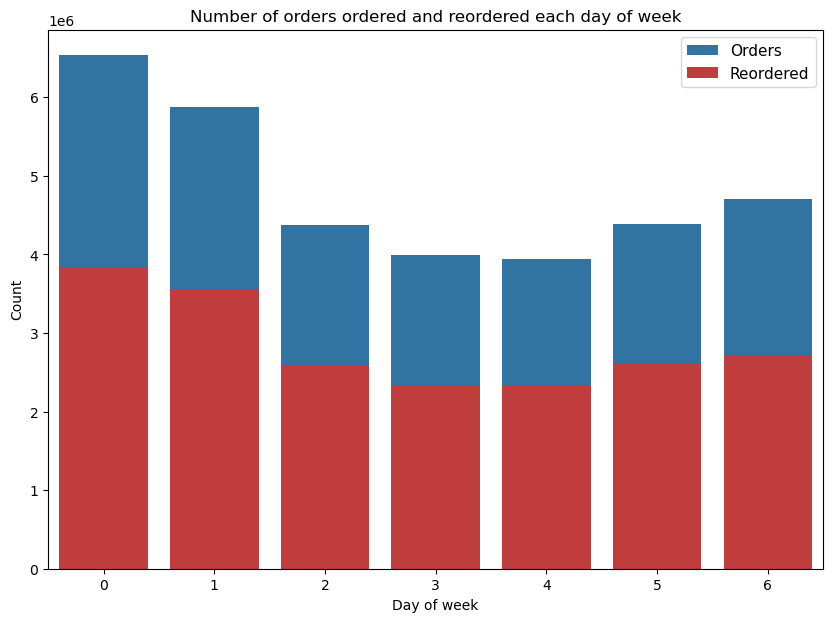

In [57]:
color_palette = sns.color_palette()

fig, axis = plt.subplots(figsize = (10,7))
axis = sns.barplot(y = temp_df_dow['total_orders'], x = temp_df_dow['order_dow'], color=color_palette[0], label = "Orders")
axis = sns.barplot(y = temp_df_dow['reorders'], x = temp_df_dow['order_dow'], color=color_palette[3],label = "Reordered")
axis.set_ylabel("Count")
axis.set_xlabel("Day of week")
axis.set_title("Number of orders ordered and reordered each day of week")
axis.legend(loc = 1, prop={'size': 11})
plt.show()

#### Q6. Number of products ordered and reordered in a particular hour of the day

In [58]:
reordered_hod=orders_product_merged.groupby('order_hour_of_day')['reordered'].apply(lambda x: (x==1).sum())
print(reordered_hod)

total_orders_hod=orders_product_merged.groupby('order_hour_of_day')['order_id'].count()
print(total_orders_hod)


order_hour_of_day
0      129003
1       67766
2       40368
3       30132
4       31889
5       55933
6      192798
7      598407
8     1130174
9     1580305
10    1726499
11    1676271
12    1583898
13    1612121
14    1635288
15    1615183
16    1533153
17    1258378
18     983991
19     757537
20     593323
21     491564
22     387990
23     243389
Name: reordered, dtype: int64
order_hour_of_day
0      228031
1      121412
2       72660
3       53759
4       55714
5       91909
6      302642
7      928239
8     1787359
9     2550569
10    2874905
11    2852701
12    2732599
13    2778054
14    2810918
15    2780731
16    2647695
17    2186409
18    1714445
19    1317576
20    1017958
21     831183
22     662053
23     419585
Name: order_id, dtype: int64


In [59]:
d_hod={'order_hour_of_day':np.arange(0,24), 'total_orders':total_orders_hod, 'reorders': reordered_hod}
temp_df_hod = pd.DataFrame(data=d_hod, index=np.arange(0,24))
temp_df_hod


,order_hour_of_day,total_orders,reorders
0,0,228031,129003
1,1,121412,67766
2,2,72660,40368
3,3,53759,30132
4,4,55714,31889
5,5,91909,55933
6,6,302642,192798
7,7,928239,598407
8,8,1787359,1130174
9,9,2550569,1580305


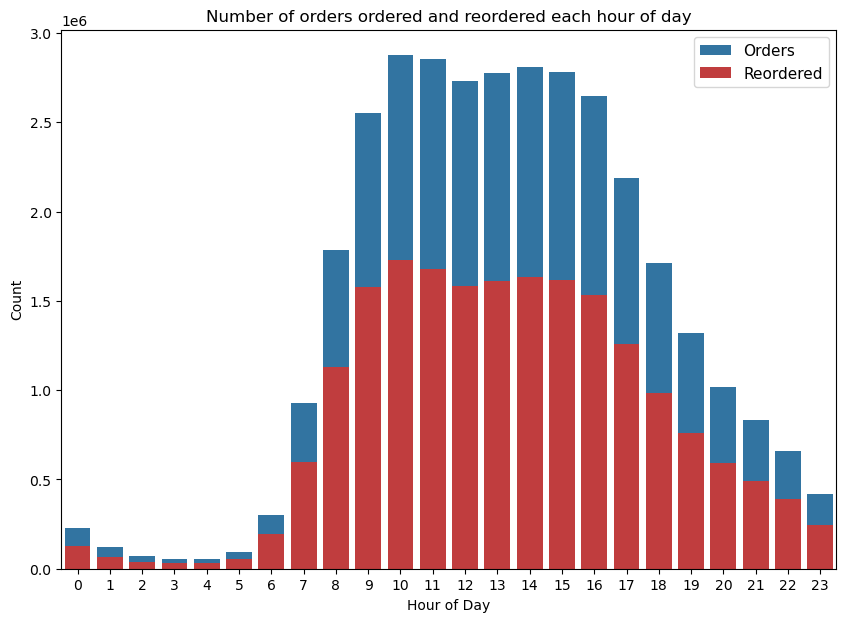

In [60]:
color_palette = sns.color_palette()

fig, axis = plt.subplots(figsize = (10,7))
axis = sns.barplot(y = temp_df_hod['total_orders'], x = temp_df_hod['order_hour_of_day'], color=color_palette[0], label = "Orders")
axis = sns.barplot(y = temp_df_hod['reorders'], x = temp_df_hod['order_hour_of_day'], color=color_palette[3], label = "Reordered")
axis.set_ylabel("Count")
axis.set_xlabel("Hour of Day")
axis.set_title("Number of orders ordered and reordered each hour of day")
axis.legend(loc = 1, prop={'size': 11})
plt.show()